In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stocktrain = pd.read_csv("C:\\Users\\Savin\\Desktop\\Google_Stock_Price_Train.csv")
stocktest = pd.read_csv("C:\\Users\\Savin\\Desktop\\Google_Stock_Price_Test.csv")

In [30]:
stocktrain

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [27]:
stocktrain.shape

(1258, 6)

In [4]:
stocktest.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [28]:
stocktest.shape

(20, 6)

In [5]:
train_stock = stocktrain.iloc[:, 1:2].values

In [6]:
train_stock
stocktrain.shape

(1258, 6)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled_data = sc.fit_transform(train_stock)

In [8]:
train_scaled_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(train_scaled_data[i-60:i, 0])
    y_train.append(train_scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping:

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [10]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
stocktrain.shape

(1258, 6)

In [14]:
regressor = Sequential()

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [19]:
## Adding the output layer:
regressor.add(Dense(units = 1))

# Compiling..!!


In [21]:
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics=['accuracy'])
regressor.fit(x_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0427 - accuracy: 0.0017
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0065 - accuracy: 0.0017
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056 - accuracy: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054 - accuracy: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0051 - accuracy: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050 - accuracy: 0.0017
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 8/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0046 - accuracy: 0.0017
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - l

In [22]:
test_stock = stocktest.iloc[:, 1:2].values

In [23]:
total_data = pd.concat((stocktrain['Open'], stocktest['Open']), axis = 0)
inputs = total_data[len(total_data) - len(stocktest) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

In [24]:
predicted_price

array([[790.4305 ],
       [787.5228 ],
       [787.28925],
       [788.4688 ],
       [791.6535 ],
       [797.3944 ],
       [803.0027 ],
       [805.70776],
       [806.30994],
       [806.0725 ],
       [805.7603 ],
       [805.5021 ],
       [805.3784 ],
       [805.922  ],
       [806.9159 ],
       [811.2394 ],
       [818.0428 ],
       [825.6186 ],
       [830.20276],
       [826.9757 ]], dtype=float32)

In [25]:
test_stock

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

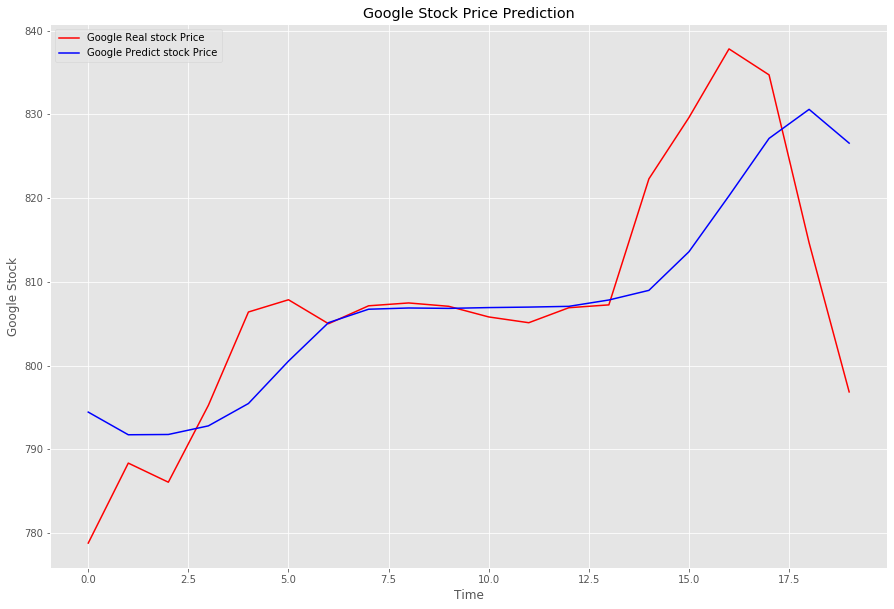

In [52]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(test_stock, color = 'red', label = 'Google Real stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Google Predict stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock')
plt.legend()
plt.show()